**KLASIFIKASI HARGA SMARTPHONE DENGAN KNN**

**Import Library**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt #visualisasi data
import pandas as pd #proses data
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

**Read Dataset**

In [ ]:
df = pd.read_csv('dataset_mobile.csv', header=None)

**Eksplorasi Data**

In [ ]:
df.shape

(2001, 21)

In [ ]:
# Menampilkan 5 data teratas
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
2,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
3,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [ ]:
# Melakukan rename pada kolom dataset sesuai dengan nama atribut
rename_col = ['battery_power','blue','clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
df.columns = rename_col
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Menghapus baris pertama (nama atribut) karena tidak diperlukan
df.drop(labels=0, axis=0, inplace=True)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
2,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
3,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
5,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1 to 2000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   battery_power  2000 non-null   object
 1   blue           2000 non-null   object
 2   clock_speed    2000 non-null   object
 3   dual_sim       2000 non-null   object
 4   fc             2000 non-null   object
 5   four_g         2000 non-null   object
 6   int_memory     2000 non-null   object
 7   m_dep          2000 non-null   object
 8   mobile_wt      2000 non-null   object
 9   n_cores        2000 non-null   object
 10  pc             2000 non-null   object
 11  px_height      2000 non-null   object
 12  px_width       2000 non-null   object
 13  ram            2000 non-null   object
 14  sc_h           2000 non-null   object
 15  sc_w           2000 non-null   object
 16  talk_time      2000 non-null   object
 17  three_g        2000 non-null   object
 18  touch_screen   2000 non-null

In [ ]:
# Mengubah tipe data ke numerik, karena "Data Type" masih berupa objek
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
# Melihat value dari target class
df['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
# Melakukan pengecekan nilai yang null
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Membuat Variabel Khusus Untuk Dataframe Yang Memiliki Fitur dan Target Class**

In [ ]:
X = df.drop(['price_range'], axis=1)

y = df['price_range']

**Membuat Data Training dan Data Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((1600, 20), (400, 20))

**Menggunakan KNN Untuk Melatih Data Training**

In [ ]:
# Mendeklarasikan nilai k
k = 5

# Membuat KNN model
model = KNeighborsClassifier(n_neighbors=k)

# Melatih model dengan data training
model.fit(X_train, y_train)

KNeighborsClassifier()

**Prediksi Target Class Dari Data Testing**

In [ ]:
# Prediksi class dilakukan menggunakan atribut pada data testing
y_pred = model.predict(X_test)
y_pred

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 2, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 1, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

**Melihat Skor Akurasi**

In [ ]:
# Mengecek prediksi akurasi
akurasi = accuracy_score(y_pred, y_test)*100

In [ ]:
print('Akurasi Model : ' + str(round(akurasi, 2)) + ' %.')

Akurasi Model : 92.75 %.


**Mengubah Nilai K**
(pada tahap ini akan dicoba beberapa nilai k yang berbeda)

In [ ]:
# Mendeklarasikan nilai k
k = 6

# Membuat KNN model
model = KNeighborsClassifier(n_neighbors=k)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi class menggunakan atribut di data testing
y_pred_6 = model.predict(X_test)

# membandingkan hasil prediksi dengan class data testing
akurasi = accuracy_score(y_pred_6, y_test)*100

print('Akurasi Model: ' + str(round(akurasi, 2)) + ' %.')

Akurasi Model: 93.75 %.


In [ ]:
# Mendeklarasikan nilai k
k = 7

# Membuat KNN model
model = KNeighborsClassifier(n_neighbors=k)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi class menggunakan atribut di data testing
y_pred_7 = model.predict(X_test)

# membandingkan hasil prediksi dengan class data testing
akurasi = accuracy_score(y_pred_7, y_test)*100

print('Akurasi Model: ' + str(round(akurasi, 2)) + ' %.')

Akurasi Model: 95.25 %.


In [ ]:
# Mendeklarasikan nilai k
k = 8

# Membuat KNN model
model = KNeighborsClassifier(n_neighbors=k)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi class menggunakan atribut di data testing
y_pred_8 = model.predict(X_test)

# membandingkan hasil prediksi dengan class data testing
akurasi = accuracy_score(y_pred_8, y_test)*100

print('Akurasi Model: ' + str(round(akurasi, 2)) + ' %.')

Akurasi Model: 95.0 %.


**Confussion Matriks**

In [ ]:
#Menggunakan nilai k = 7 dikarenakan akurasi model yang dihasilkan tertinggi dengan nilai 95.25%
cm = confusion_matrix(y_test, y_pred_7)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 95   0   0   0]
 [  3  87   2   0]
 [  0   5  89   5]
 [  0   0   4 110]]


**Visualisasi Data Confussion Matriks**

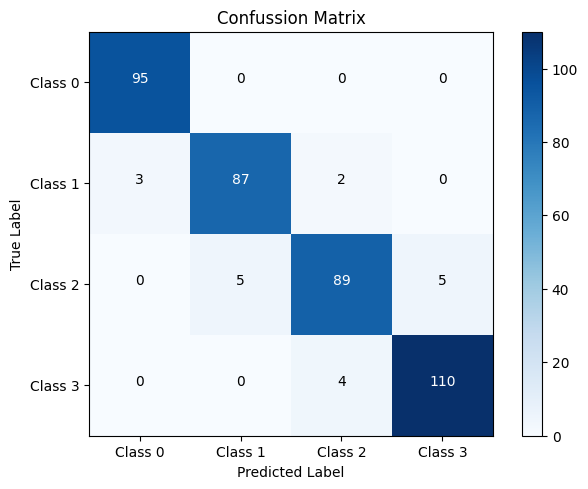

In [ ]:
# Membuat plot confussion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Menambahkan label pada garis horizontal (x) dan vertikal (y)
plt.title('Confussion Matrix')
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.yticks(tick_marks, ['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Menambahkan nilai di dalam kotak matriks
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Menampilkan plot
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Menghitung TP, FP, dan FN Tiap Class**

In [ ]:
#Note
#a: class 0
#b: class 1
#c: class 2
#d: class 3

#TP = True Positive
#FP = False Positive
#FN = False Negative


# Menghitung TP tiap class
TP_a = cm[0,0]
TP_b = cm[1,1]
TP_c = cm[2,2]
TP_d = cm[3,3]

print("TP a =", TP_a)
print("TP b =", TP_b)
print("TP c =", TP_c)
print("TP d =", TP_d)
print("\n")

# Menghitung FP tiap class
FP_a = sum(cm[1:3, 0])
FP_b = sum(cm[:4, 1]) - cm[1,1]
FP_c = sum(cm[:4, 2]) - cm[2,2]
FP_d = sum(cm[:4, 3]) - cm[3,3]

print("FP a =", FP_a)
print("FP b =", FP_b)
print("FP c =", FP_c)
print("FP d =", FP_d)
print("\n")

# Menghitung FN tiap class
FN_a = sum(cm[0, :4]) - cm[0,0]
FN_b = sum(cm[1, :4]) - cm[1,1]
FN_c = sum(cm[2, :4]) - cm[2,2]
FN_d = sum(cm[3, :4]) - cm[3,3]

print("FN a =", FN_a)
print("FN b =", FN_b)
print("FN c =", FN_c)
print("FN d =", FN_d)

TP a = 95
TP b = 87
TP c = 89
TP d = 110


FP a = 3
FP b = 5
FP c = 6
FP d = 5


FN a = 0
FN b = 5
FN c = 10
FN d = 4


**Menghitung Precision**

In [ ]:
P_a = TP_a/(TP_a+FP_a)
P_b = TP_b/(TP_b+FP_b)
P_c = TP_c/(TP_c+FP_c)
P_d = TP_d/(TP_d+FP_d)
P = (P_a+P_b+P_c+P_d)/4
print('Precision : {0:0.4f}'.format(P))

Precision : 0.9521


**Menghitung Recall**

In [ ]:
R_a = TP_a/(TP_a+FN_a)
R_b = TP_b/(TP_b+FN_b)
R_c = TP_c/(TP_c+FN_c)
R_d = TP_d/(TP_d+FN_d)
R = (R_a+R_b+R_c+R_d)/4
print('Recall : {0:0.4f}'.format(R))

Recall : 0.9524
